Consider the following Markov chain. \\
    • The state space $S = \{S^{1} , S^{2} , · · · , S^{50}\}$, where the cardinality of the state space is 50. \\
    • The transition probability is given by \\
$P(S_1|S_1) = 1/2, P(S_2|S_1) = 1/2$ \\
$P(S_{50}|S_{50}) = 1/2, P(S_{49} |S_{50}) = 1/2$ \\
$P(S_{i−1}|S_{i}) = 1/3, P(S_{i}|S_{i}) = 1/3, P(S_{i+1}|S_{i}) = 1/3$, for 2 ≤ i ≤ 49. \\

(a) Obtain the stationary distribution of this Markov chain by solving the stationarity equation: \\
$p = Pp$, \\
where $p = [p_1 , · · · , p_{50} ]^\intercal$ is the stationary distribution vector, and P is the transition
probability matrix of which (i, j) element $P_{ij} = P (S_{i} |S_{j}).$

In [1]:
import numpy as np
import scipy.linalg as la

In [2]:
P = np.zeros((50,50))

In [3]:
P[0,0] = 1/2
P[1,0] = 1/2
P[49,49] = 1/2
P[48,49] = 1/2

In [4]:
for i in range(1,49):
    P[i-1,i] = 1/3
    P[i,i] = 1/3
    P[i+1,i] = 1/3
print(P)

[[0.5        0.33333333 0.         ... 0.         0.         0.        ]
 [0.5        0.33333333 0.33333333 ... 0.         0.         0.        ]
 [0.         0.33333333 0.33333333 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.33333333 0.33333333 0.        ]
 [0.         0.         0.         ... 0.33333333 0.33333333 0.5       ]
 [0.         0.         0.         ... 0.         0.33333333 0.5       ]]


In [5]:
#x = la.solve(P - np.identity(50), np.zeros(50))
#x

The above method counld not work becuase $I-P$ is the singular matrix.

In [6]:
eigvals, eigvecs = la.eig(P)
eigvals[37]

(0.9999999999999997+0j)

In [7]:
sum = 0
for i in eigvecs[:,37]:
    sum += i

In [8]:
p = eigvecs[:,37]/sum # Be careful! eigves[37] is not corresponding e-vectors to e-values
p

array([0.01351351, 0.02027027, 0.02027027, 0.02027027, 0.02027027,
       0.02027027, 0.02027027, 0.02027027, 0.02027027, 0.02027027,
       0.02027027, 0.02027027, 0.02027027, 0.02027027, 0.02027027,
       0.02027027, 0.02027027, 0.02027027, 0.02027027, 0.02027027,
       0.02027027, 0.02027027, 0.02027027, 0.02027027, 0.02027027,
       0.02027027, 0.02027027, 0.02027027, 0.02027027, 0.02027027,
       0.02027027, 0.02027027, 0.02027027, 0.02027027, 0.02027027,
       0.02027027, 0.02027027, 0.02027027, 0.02027027, 0.02027027,
       0.02027027, 0.02027027, 0.02027027, 0.02027027, 0.02027027,
       0.02027027, 0.02027027, 0.02027027, 0.02027027, 0.01351351])

(b) Now, set $p_0 = [1, 0, 0, · · · , 0]$ and use iteration: \\
$p_n = Pp_{n−1}, n = 1, 2, · · ·$ \\
Draw $p_{n}$ for each n in a figure, where the x-axis represents state index and the y-axis represent its stationary probability value. What do you observe as n increases? Compare this with the result in Problem (a).

array([0.01351355, 0.02027032, 0.02027032, 0.02027032, 0.02027032,
       0.02027032, 0.02027032, 0.02027032, 0.02027032, 0.02027032,
       0.02027031, 0.02027031, 0.02027031, 0.02027031, 0.0202703 ,
       0.0202703 , 0.0202703 , 0.0202703 , 0.02027029, 0.02027029,
       0.02027029, 0.02027028, 0.02027028, 0.02027028, 0.02027027,
       0.02027027, 0.02027027, 0.02027026, 0.02027026, 0.02027025,
       0.02027025, 0.02027025, 0.02027025, 0.02027024, 0.02027024,
       0.02027024, 0.02027023, 0.02027023, 0.02027023, 0.02027023,
       0.02027022, 0.02027022, 0.02027022, 0.02027022, 0.02027022,
       0.02027022, 0.02027022, 0.02027022, 0.02027022, 0.01351348])

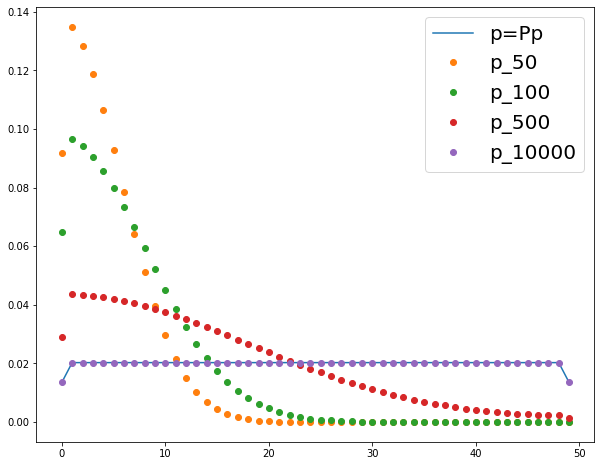

In [9]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 8))  # Create a figure and an axes.
plt.plot(p, label='p=Pp')
p_0 = np.zeros(50)
p_0[0] = 1
inf_P = np.identity(50)
for i in range(10000):
    inf_P = inf_P @ P   
    if i == 49:
        plt.plot(inf_P @ p_0 , 'o', label= "p_"+str(i+1))        
    elif i == 99:
        plt.plot(inf_P @ p_0 , 'o', label= "p_"+str(i+1))
    elif i == 499:
        plt.plot(inf_P @ p_0 , 'o', label= "p_"+str(i+1))        
    elif i == 9999:
        plt.plot(inf_P @ p_0 , 'o', linestyle = 'None', label= "p_"+str(i+1))
plt.legend(prop={"size":20})
        

stationary_p = inf_P @ p_0
stationary_p